## Question 5C
Take a binary image and a structuring element to perform boundary extraction using morphological operatioin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

In [2]:
def erosion(image, mask):
    considered_pixel = mask.copy()
    new_image = image.copy()
    mask_x, mask_y = mask.shape
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            flag = True
            for l in range(mask_y):
                for r in range(mask_x):
                    if mask[l, r] == 0:
                        continue

                    xx = l + i - (mask_x//2)
                    yy = r + j - (mask_y//2)
                    considered_pixel[l, r] = 0

                    if (xx>=0 and xx<height and yy>=0 and yy<width):
                        considered_pixel[l, r] = image[xx, yy]
                    
                    if considered_pixel[l, r] == 0:
                        flag = False
                        break
                
                if flag == True:
                    new_image[i, j] = 255
                else:
                    new_image[i, j] = 0

    return new_image.astype(np.uint8)

In [3]:
def boundary_extraction(image):
    mask = np.ones((3,3), dtype=np.uint8)
    erotedImage = erosion(image, mask)
    output_image = image - erotedImage
    return output_image

In [5]:
original_image = cv.imread("licoln.tif", cv.IMREAD_GRAYSCALE)
extract_boundary = boundary_extraction(original_image)

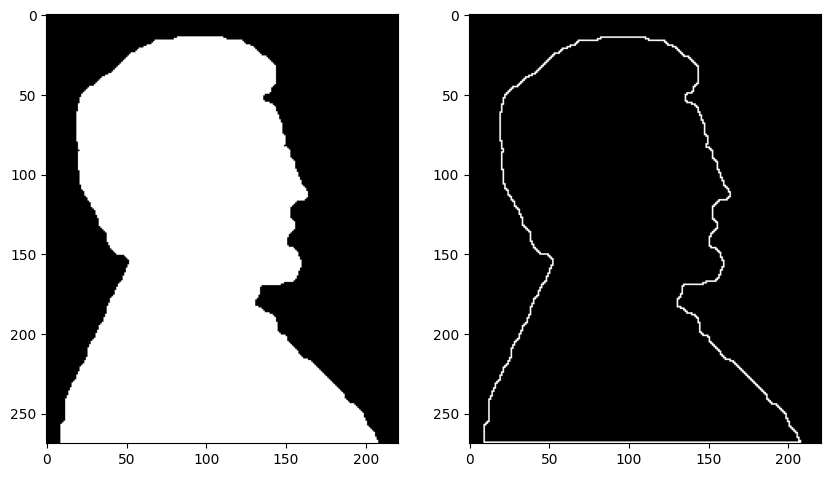

In [8]:
plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(original_image, cmap="gray")

plt.subplot(122)
plt.imshow(extract_boundary, cmap="gray")